In [1]:
import pandas as pd

In [2]:
#Reading in a short story as text sample into Python
with open("the-verdict.txt", "r", encoding = "utf-8") as f:
          raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20398
﻿I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no


### Preprocessing Steps (Chapter 2)

#### 1. Tokenizing Text

In [5]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [6]:
#separting punction and spaces from the text
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [7]:
#remvoing white spaces
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [8]:
#extending the tokenizer to handle wider range of punctuations
text = "Hello, world. Is this-- a test."
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print("Tokenized text: ",result)

Tokenized text:  ['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '.']


In [9]:
#applying this tokenizer to the full Edith Warton's story
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(f"length of the complete tokenized text from Edith Wharton story: {len(preprocessed)}")

length of the complete tokenized text from Edith Wharton story: 4690


In [10]:
#printing first 30 tokens
print(f"First 30 tokens: {preprocessed[:30]}")

First 30 tokens: ['\ufeffI', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


#### 2. Converting token into token IDs

create a list of all unique tokens and sort them alphabetically to determine the vocabulary

In [13]:
all_words = sorted(list(set(preprocessed)))
vocab_size = len(all_words)
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 1131


In [14]:
#creating a vocabulary
vocab = {token: integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i > 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)
('His', 51)


In [15]:
#implementing a tokenizer class to tokenize text into tokens, encode tokens to integers and decode integers to tokens

class SimpleTokenzierV1:
    def __init__(self, vocab):
        self.str_to_int = vocab #A
        self.int_to_str = {i:s for s,i in vocab.items()} #B

    def encode(self, text): #C
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids): #D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #E
        return text

In [16]:
#instantiating tokenizer object to test the SimpleTokenzierV1 class
tokenizer = SimpleTokenzierV1(vocab)

In [17]:
text = raw_text[:99]
ids = tokenizer.encode(text)
print(f"Token ids for sample text from Edith Warton's story: {ids}")

Token ids for sample text from Edith Warton's story: [1130, 44, 149, 1003, 57, 38, 818, 115, 256, 486, 6, 1002, 115, 500, 435, 392, 6, 908, 585, 1077, 709]


In [18]:
#testing decoder on the token ids above
print(f"text from decoding token ids using SimpleTokenzierV1 class: \n{tokenizer.decode(ids)}")

text from decoding token ids using SimpleTokenzierV1 class: 
﻿I HAD always thought Jack Gisburn rather a cheap genius -- though a good fellow enough -- so it was no


In [19]:
#running the tokenizer on a sample text which is not a part of the text used to create the vocab
text = "Hello, do you like tea?"
tokenizer.encode(text)

KeyError: 'Hello'

here, the key error suggests that Hello is not a part of the vocabulary and hence we need to use large and diverse text in order to extend the vocabulary when creating a LARGE language models

#### 3. Adding special context tokens

modifying SimpleTokenzierV1 to support new tokens for unknown words and document boundaries

In [56]:
'''adding tokens:
1. <unk> - to represent unknown or new words that are not part of the vocabulary
2. <|endoftext|> -  marker to separate two different text source from each other
'''
all_tokens =  sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<unk>"])
vocab = {token:integer for integer, token in enumerate(all_tokens)}

print(f"length of the vocabulary after extending the vocab with unknown words and end of text markers: {len(vocab.items())}")

length of the vocabulary after extending the vocab with unknown words and end of text markers: 1133


In [57]:
#printing a sample from the end of the extended vocab
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('your', 1128)
('yourself', 1129)
('\ufeffI', 1130)
('<|endoftext|>', 1131)
('<unk>', 1132)


In [58]:
#SimpleTokenzierV2 replaces unknown words with the token "<unk>"
class SimpleTokenzierV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.str_to_int
                       else "<unk>" for item in preprocessed] #A
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #B
        return text

In [59]:
#concatenating two unrelated texts
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))
print(f"concatenated text with endoftext marker: \n{text}")

concatenated text with endoftext marker: 
Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [60]:
#testing the SimpleTokenzierV2 on a text that is concatenation of two unrelated texts
tokenizer = SimpleTokenzierV2(vocab)
print(tokenizer.encode(text))

[1132, 5, 355, 1126, 628, 975, 10, 1131, 55, 988, 956, 984, 722, 988, 1132, 7]


we can see that the list of token IDs contains 1131 for the <|endoftext|> separator token as well as two 1132 tokens, which are used for unknown words.

In [62]:
#testing detokenizer for SimpleTokenzierV2
print(tokenizer.decode(tokenizer.encode(text)))

<unk>, do you like tea? <|endoftext|> In the sunlit terraces of the <unk>.


#### 4. BPE: Byte pair encoding

unlike the simple tokenizer implemented above, GPT uses byte pair encoding tokenizer which does not replace unknown words with "unk" token but breaks down the word into subword units

In [65]:
pip install tiktoken

Note: you may need to restart the kernel to use updated packages.


In [66]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.9.0


In [67]:
tokenizer = tiktoken.get_encoding("gpt2") #similar to SimpleTokenzierV2

In [68]:
#encoding using BPE
text = "Hello, do you like tea? <|endoftext|> In the sunlit terra"
integers = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 1059, 430]


here, the tokenzier handles unknown words by breaking them down into subword units or even individual characters provinding them the largest token id

In [70]:
#decoding using BPE
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terra


In [71]:
text = "Akwirw ier"
integers = tokenizer.encode(text)
strings = tokenizer.decode(integers)
print(f"token id of unknown words broken down into subword units: {integers}")
print(f"text of unknown words from token ids: {strings}")

token id of unknown words broken down into subword units: [33901, 86, 343, 86, 220, 959]
text of unknown words from token ids: Akwirw ier


BPE is able to handle unknown words by building a vocab by iteratively merging frequent characters into subwords and frequest subwords into words

#### 5. Data Sampling with a sliding window

In [74]:
#tokenizing the entire Edith Warton story usinf the BPE tokenizer
with open("the-verdict.txt", "r", encoding = "utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(f"length of tokenized Edith Warton Story {len(enc_text)}")

length of tokenized Edith Warton Story 5066


In [75]:
#taking a sample of first 50 tokens
enc_sample = enc_text[50:]

In [76]:
#creating input-target pairs for next word prediction
context_size = 4 #A

x = enc_sample[:context_size] #contains the input tokens
y = enc_sample[1:context_size+1] #contains targets' inputs shiftd by 1

print(f"x: {x}")
print(f"y:        {y}")

x: [5527, 27075, 11, 290]
y:        [27075, 11, 290, 4920]


In [77]:
#creating the next-word prediction
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "------>" , desired)

[5527] ------> 27075
[5527, 27075] ------> 11
[5527, 27075, 11] ------> 290
[5527, 27075, 11, 290] ------> 4920


In [78]:
#creating the next-word prediction - visualizing the decoded text
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "------>" , tokenizer.decode([desired]))

 rich ------>  widow
 rich widow ------> ,
 rich widow, ------>  and
 rich widow, and ------>  established


In [79]:
#implementing a data loader that iterates over the input dataset and returns inputs & targets as pytorch tensors
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt) #A

        for i in range(0, len(token_ids) - max_length, stride): #B
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self): #C
        return len(self.input_ids)

    def __getitem__(self, idx): #D
        return self.input_ids[idx], self.target_ids[idx]

In [80]:
#loading the input in batches via PyTorch DataLoader
def create_dataloader_v1(txt, batch_size = 4, max_length = 256, stride = 128, shuffle = True, drop_last = True):
    tokenizer = tiktoken.get_encoding("gpt2") #A
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = shuffle, drop_last = drop_last)
    return dataloader

In [81]:
#testing create_dataloader_v1 with batch_size with 1 for an LLM with context size of 4
with open("the-verdict.txt", "r", encoding = "utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size = 1, max_length = 4, stride = 1, shuffle = False, drop_last = False)
data_iter = iter(dataloader) #A
first_batch = next(data_iter)
print(first_batch)

[tensor([[171, 119, 123,  40]]), tensor([[119, 123,  40, 367]])]


In [82]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[119, 123,  40, 367]]), tensor([[ 123,   40,  367, 2885]])]


- if we compare the first and the second batch - we can observe that batch token IDs in the second batch have shifted by one position as compared to the first batch
- stride setting determines the number of positons the tokens shift across batches, thereby emulating a sliding window approach
- if the stride is set equal to the input window size it prevents overlap between batches

In [84]:
#using the dataloader to sample with a batch size>1
dataloader = create_dataloader_v1(raw_text, batch_size = 8, max_length = 4, stride = 4, shuffle = False, drop_last = False)
data_iter = iter(dataloader) #A
inputs, targets = next(data_iter)
print(f"Inputs: \n{inputs}")
print(f"Targets: \n{targets}")

Inputs: 
tensor([[  171,   119,   123,    40],
        [  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284]])
Targets: 
tensor([[  119,   123,    40,   367],
        [ 2885,  1464,  1807,  3619],
        [  402,   271, 10899,  2138],
        [  257,  7026, 15632,   438],
        [ 2016,   257,   922,  5891],
        [ 1576,   438,   568,   340],
        [  373,   645,  1049,  5975],
        [  284,   502,   284,  3285]])


increasing the stride to 4 ensure no word is skipped and avoids any overlap between batches (more overlap increase overfitting)

#### 6. Creating token embeddings

Vector representation of token IDs along with token positions (absolute positional embedding) that will serve as an input data format for LLMs

In [88]:
#taking a sample of four input tokens
input_ids = torch.tensor([2, 3, 5, 1])

In [89]:
#taking a vocab size of 6 and embedding size of 3
vocab_size = 6
output_dim = 3

In [90]:
'''taking the vocab_size and output_dim to instantiate a embedding layer in PyTorch 
(setting random seed to 123 for reproducibility)'''

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


- the above matrix is of 6x3 with 6 rows one for each token and 3 columns one for each embedding dimension
- these random values are further optimized in the LLM training process via backpropagation

In [92]:
#applying the instantiated embedding layer to a token ID to obtain the embedding vector
print(embedding_layer(torch.tensor([3]))) #lookup the embedding vector for this token id in the embedding layer weight matrix above

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [93]:
#applying the instantiated embedding layer to all token ID to obtain the embedding vector
print(embedding_layer(input_ids)) 

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


#### 7. Encoding word positions

In [95]:
output_dim = 256
vocab_size = 50257
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [96]:
#instantiating the data loader
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size = 8, max_length = max_length, stride = max_length, 
                                  shuffle = False, drop_last = False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print(f"Token IDs: \n{inputs}")
print(f"Inputs shape: \n{inputs.shape}")

Token IDs: 
tensor([[  171,   119,   123,    40],
        [  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284]])
Inputs shape: 
torch.Size([8, 4])


the token ID tensor of shape 8X4 indicates that the data batch consists 8 text samples with 4 tokens each

In [98]:
#using the embedding layer to embed these token ids in 256 dimensional vectors
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [99]:
'''following the GPT model's absolute positional embedding approach - creating another embedding layer 
    with same dimension as token_embedding_layer'''

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [100]:
#adding the pos_embeddings to token_embeddings in each of the 8 batches
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


these input_embeddings are now ready to be processed by the main LLM Module

### Coding attention mechanism (Chapter 3)

In [103]:
#taking a sample input sentence
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1) 
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]] # step (x^6)
)

#### 8. Computing intermediate attention scores

In [105]:
#computing intermediate attention scores between query and input token by taking dot product of query with input token
query = inputs[1] #A
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(f"the computed intermediate attention scores are: \n{attn_scores_2}")

the computed intermediate attention scores are: 
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


#### 9. Obtaining attention weights

In [107]:
#obtaining attention weights (that sum up to 1) by normalizing the attention scores
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print(f"attention weights: {attn_weights_2_tmp}")
print(f"sum of attention weights: {attn_weights_2_tmp.sum()}")

attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum of attention weights: 1.0000001192092896


In [108]:
'''softmax function is commonly used to normalize the attention scores 
(can handle extreme values, ensures attn. weights are alays positive etc.)'''
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print(f"attention weights: {attn_weights_2_naive}")
print(f"sum of attention weights: {attn_weights_2_naive.sum()}")

attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weights: 1.0


In [109]:
#using PyTorch softmax funtion to prevent overflow and underflow while dealing with large or small input values
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)
print(f"attention weights: {attn_weights_2}")
print(f"sum of attention weights: {attn_weights_2.sum()}")

attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum of attention weights: 1.0


#### 10. Calculating context vector

In [111]:
'''calculatin context vector by multiplying embedded input tokens with corresponding attention weights 
and then summing the resulting vectors'''
query = inputs[1] #second input token is the query
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [112]:
#extending the above implementation to calculate the attention weights and context vector for all inputs
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [113]:
#getting the attn scores without for loop
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [114]:
#normalizing each row in the above output to sum up the values to 1
attn_weights  = torch.softmax(attn_scores, dim=1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [115]:
#verifying the normalization
row_2_sum = sum([0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452])
print(f"Row 2 sum: {row_2_sum}")
print(f"All row sum: {attn_weights.sum(dim=1)}")

Row 2 sum: 0.9999
All row sum: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [116]:
#getting context vectors
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [117]:
#cross validating th context vecs with the previously generated context vec for second row
print(f"Previous 2nd context vector: {context_vec_2}")

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


#### 11. Implementing self-attention with trainable weights
Enable LLM to learn from data and improve its performance on specific tasks

In [119]:
#computing attention weights step by step
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

In [120]:
#intializing 3 weight metrics
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =  False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =  False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =  False)

In [121]:
#computing query, key, and value vectors
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [122]:
#obtaining all keys and values
keys = inputs @ W_key
value = inputs @ W_value
print(f"keys.shape: {keys.shape}")
print(f"value.shape: {value.shape}")

keys.shape: torch.Size([6, 2])
value.shape: torch.Size([6, 2])


In [123]:
#computing attention scores
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [124]:
#applying across all attention scores
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [125]:
'''normalizing the attention scores using softmax to get attention weights.
scaling attention scores by dividing them by square root (or exponentiating by 0.5) of the embedding dimension of the keys
'''
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k ** 0.5, dim = -1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [126]:
#computing context vectors
context_vec_2 = attn_weights_2 @ value
print(context_vec_2)

tensor([0.3061, 0.8210])


In [127]:
# implementing a compact self-attention python class
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        '''initializes trainable weights for:
        queries, keys, values -- each transforming the input 
        with dimension d_in to dimension d_out
        '''
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        '''computing attention scores'''
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [128]:
#using the above class
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


the second row here matches with the context_vec_2

In [130]:
#self-attention class using PyTorch's Linear layers (has optimized weight intialization scheme)
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [131]:
#using the above class
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


both sa_v1 and sa_v2 have different outputs because they use different initial weights

#### 12. Hiding future words with casual attention (masked attention)

In [134]:
#computing attention weights using softmax function
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [135]:
#using PyTorch tril function to create a mask where values above the diagnol are zero
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [136]:
#multiplying the mask with attention weights to zero out the values above the diagnol
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [137]:
#renormalizing the attention weights to sum up the weight to 1 in each row
row_sums = masked_simple.sum(dim = 1, keepdim = True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [138]:
#masking attention scores with negative infinity values
mask = torch.triu(torch.ones(context_length, context_length), diagonal = 1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [139]:
#applying softmax function on the masked results to normalize each row
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim = 1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


Softmax function converts intputs to probability distribution and treats negative infinity values as zero probability

#### 13. Masking additonal attention weights with dropout

DL technique where randomly selected layers are ignored during training (dropping them out)

In [143]:
#implementing drop out rate of 50% - masking 50% of attention weights
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


- random elements are set to zero and the remaining values as scaled by a factor of 1/0.5 to compensate for this reduction in elements.
- this scaling helps maintain the average influence of the attention mechanism during both training and inference

In [145]:
#applying drop out to attention weight matrix
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


In [146]:
#implementing compact casual attention class
class CasualAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout) #A
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1)) #B

    def forward(self, x):
        b, num_tokens, d_in = x.shape #batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) #C
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) #D
        attn_weights = torch.softmax(attn_scores / (keys.shape[-1]**0.5), dim = -1)
        attn_weights = self.dropout(attn_weights)

        context_vec = attn_weights @ values
        return context_vec

In [147]:
#using the CasualAttention class
batch_size = 2
batch = torch.randn(batch_size, context_length, d_in)  

torch.manual_seed(123)
context_length = batch.shape[1]
ca = CasualAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print(f"context_vecs shape: {context_vecs.shape}")

context_vecs shape: torch.Size([2, 6, 2])


#### 14. Extending single-head attention to multi-head attention

dividing attention mechanism into mutiple head - each operating independently

In [150]:
#stacking multiple single-head attention layers

class MultiHeadAttentionWrapper(nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        self.heads = nn.ModuleList([CasualAttention(d_in, d_out, context_length, dropout, qkv_bias)
                                   for _ in range(num_heads)])

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim = -1)

In [151]:
#using MultiHeadAttentionWrapper class
torch.manual_seed(123)
context_length = batch.shape[1] #number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vecs = mha(batch)

print(context_vecs)
print(f"context_vecs shape: {context_vecs.shape}")

tensor([[[ 0.4593, -0.2785, -0.4767, -0.1330],
         [ 0.4732, -0.1399, -0.4944, -0.1421],
         [ 0.1026, -0.4158, -0.1594,  0.2188],
         [ 0.1373, -0.1506, -0.1594,  0.0565],
         [-0.3830, -0.0754,  0.1471,  0.2819],
         [-0.0794, -0.2116,  0.1015,  0.3038]],

        [[ 0.1174,  1.1445,  0.0553, -0.7877],
         [ 0.3912,  0.9934, -0.3112, -0.7816],
         [ 0.3936,  0.9043, -0.3300, -0.6898],
         [ 0.2705,  0.4034, -0.2218, -0.4146],
         [ 0.3510,  0.6279, -0.2101, -0.1913],
         [ 0.3235,  0.6054, -0.2006, -0.2066]]], grad_fn=<CatBackward0>)
context_vecs shape: torch.Size([2, 6, 4])


In [152]:
#implementing multi-head attention with weight splits
class MultiHeadAttention(nn.Module):
    
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias = False):
        super().__init__()
        assert d_out % num_heads == 0 #d_out must be visible by num
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads #A
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out) #B
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal = 1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x) #C
        queries = self.W_query(x) #C
        values = self.W_value(x) #C

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) #D
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim) #D
        values = values.view(b, num_tokens, self.num_heads, self.head_dim) #D

        keys = keys.transpose(1, 2) #E
        queries = queries.transpose(1, 2) #E
        values = values.transpose(1, 2) #E

        attn_scores = queries @ keys.transpose(2, 3) #F
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] #G

        attn_scores.masked_fill_(mask_bool, -torch.inf) #H

        attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2) #I #J
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) #K
        return context_vec

In [153]:
#using the MultiHeadAttention class
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vecs = mha(batch)
print(context_vecs)
print(f"context_vecs shape: {context_vecs.shape}")

tensor([[[0.0536, 0.8755],
         [0.0841, 0.9012],
         [0.0730, 0.6893],
         [0.1485, 0.7239],
         [0.2545, 0.4834],
         [0.1575, 0.5968]],

        [[0.4336, 0.8920],
         [0.3494, 1.0295],
         [0.3310, 1.0099],
         [0.2171, 0.8726],
         [0.2820, 0.9429],
         [0.2826, 0.9248]]], grad_fn=<ViewBackward0>)
context_vecs shape: torch.Size([2, 6, 2])


### Implementing a GPT model from scratch to generate text (Chapter 4)

#### 15. Implementing a dummy GPT model architecture class

In [156]:
#conifguration of small GPT 2 model
GPT_CONFIG_124M = {
   "vocab_size": 50257,  # Vocabulary size
   "context_length": 1024,  # Context length
   "emb_dim": 768,  # Embedding dimension
   "n_heads": 12,  # Number of attention heads
   "n_layers": 12,  # Number of layers
   "drop_rate": 0.1,  # Dropout rate
   "qkv_bias": False  # Query-Key-Value bias
}

In [157]:
import torch
import torch.nn as nn

In [158]:
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias = False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device = in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):
        return x

class DummyLayerNorm(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):
        return x

- DummyGPTModel is a simplified version of GPT like model using pytorch neural network module.
- It has token and positional embeddings, dropout, a series of tranformer blocks(DummyTransformerBlock), a final layer of normalization(DummyLayerNorm) and a linear output layer (out_head)

In [160]:
#preparing input data and initializing GPT model
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [161]:
#initializing 124 million parameter DummyGPTModel instance and feed it the tokenized batch
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print(f"Output shape: {logits.shape}")
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


- output tensor has two rows for 2 text samples with 4 tokens each being a 50257 dimensional vector - matches the size of the tokenizer vocabulary
- Each of the 50267 dimensions refers to a unique token in the vocabulary which is later converted into token IDs to decode into words

#### 16. Normalizing activations with layer normalization

- training deep neural networks is challenging due to vanishing and exploding gradients as it prevents the learning process from finding the right set of parameters that reduce the loss function and hence we implement layer normalization to adjust the activations of the NN to have a unit variance (mean = 0, variance = 1)
- this speeds up convergence to effecitve weights and ensures proper training.

In [286]:
#implementing neural network layers with 5 inputs and 6 output - applying to tow inputs
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


two rows with layer outputs from each input

In [289]:
#examining mean and variance for each input row
mean = out.mean(dim = -1, keepdim = True)
var = out.var(dim = -1, keepdim = True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [291]:
#applying layer normalization to layer outputs
out_norm = (out - mean)/torch.sqrt(var)
mean = out_norm.mean(dim = -1, keepdim = True)
var = out_norm.var(dim = -1, keepdim = True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

print("\n\nprinting outputs for better visbility by turning off scientific notation:\n")
torch.set_printoptions(sci_mode = False)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


printing outputs for better visbility by turning off scientific notation:

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


the mean and variance of normalized layers are 0 & 1 respectively post apllying normalization layer

In [302]:
#layer normalization class
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True)
        var = x.var(dim = -1, keepdim = True, unbiased = False)
        norm_x = (x - mean)/torch.sqrt(var + self.eps) #eps prevents division by 0 during normalization
        return self.scale * norm_x + self.shift

In [306]:
#applying layer norm to batch input
ln = LayerNorm(emb_dim = 5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim = -1, keepdim = True)
var = out_ln.var(dim = -1, unbiased = False, keepdim = True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


#### 17. Implementing feed forward neural networks with GELU activations

In [313]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi))* (x + 0.044715 * torch.pow(x, 3)))) 

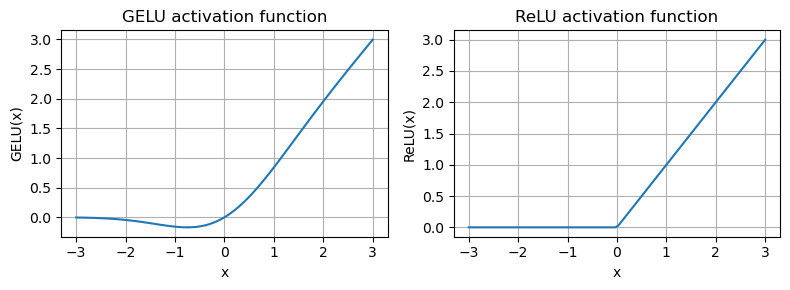

In [325]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

gelu, relu = nn.GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100)  # A
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8,3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"])):
    plt.subplot(1, 2, i+1)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

GELU has no-zero gradient for negative values as compared to ReLU (which is 0 for negative values which sometimes make optimizations harder has is doen't allow nuanced outputs). GELU on the other hand allows even the neurons that have recioeved negative input to contribute to learning process

In [338]:
#feed forward class - consisting of two linear layers
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), #Linear transformation --> increases embedding dimension by a factor of 4
            GELU(), #non-linear GELU activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]) #Linear transformation --> decreases embedding dimension by a factor of 4
                                    ) 

    def forward(self, x):
        return self.layers(x)

In [334]:
#initializing FeedForward class with batch size of 2, token 3 and embedding size 768
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


#### 18. Adding shortcut connections (skip connections)

In [345]:
#illustrating shortcut connections - with 5 NN layers
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(
            nn.Linear(layer_sizes[0], layer_sizes[1]), 
            GELU()),
            nn.Sequential(
            nn.Linear(layer_sizes[1], layer_sizes[2]), 
            GELU()),
            nn.Sequential(
            nn.Linear(layer_sizes[2], layer_sizes[3]), 
            GELU()),
            nn.Sequential(
            nn.Linear(layer_sizes[3], layer_sizes[4]), 
            GELU()),
            nn.Sequential(
            nn.Linear(layer_sizes[4], layer_sizes[5]), 
            GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            #compute the output of the current layer
            layer_output - layer(x)
            #check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output

            else:
                x = layer_output

        return x

In [347]:
#initializing neural network without shortcut connections
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) #specifying random seed for initial weight
model_wihtout_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut = False)